In [117]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

<Axes: xlabel='job_title_short'>

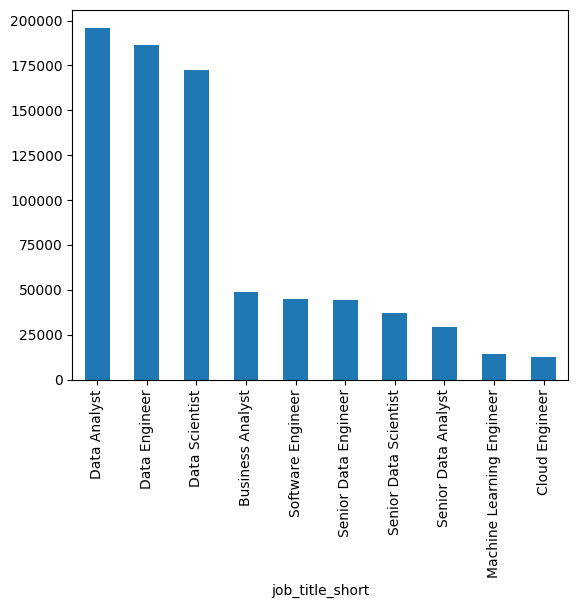

In [2]:
fig, ax = plt.subplots()

df['job_title_short'].value_counts().plot(kind='bar', ax=ax)

<Axes: xlabel='job_schedule_type'>

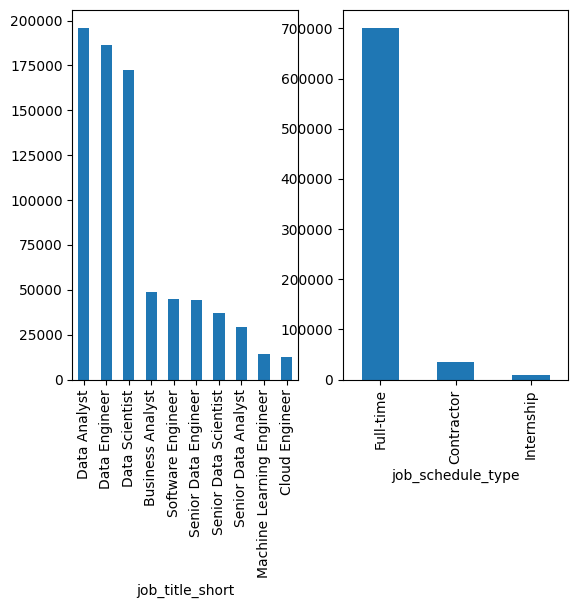

In [3]:
fig, ax = plt.subplots(1,2)
df['job_title_short'].value_counts().plot(kind='bar', ax=ax[0])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[1])
# need to be fixed the layout

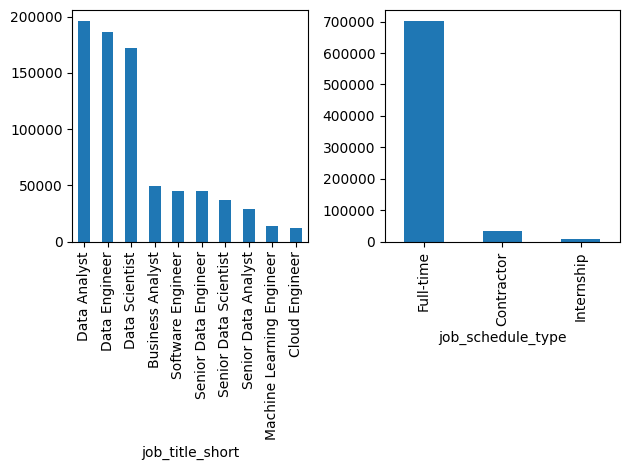

In [4]:
fig, ax = plt.subplots(1,2)

df['job_title_short'].value_counts().plot(kind='bar', ax=ax[0])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[1])

fig.tight_layout() # now more readable

In [23]:
#counting skills by job title
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
293,codecommit,Business Analyst,1
2233,xamarin,Machine Learning Engineer,1
1087,mlr,Machine Learning Engineer,1


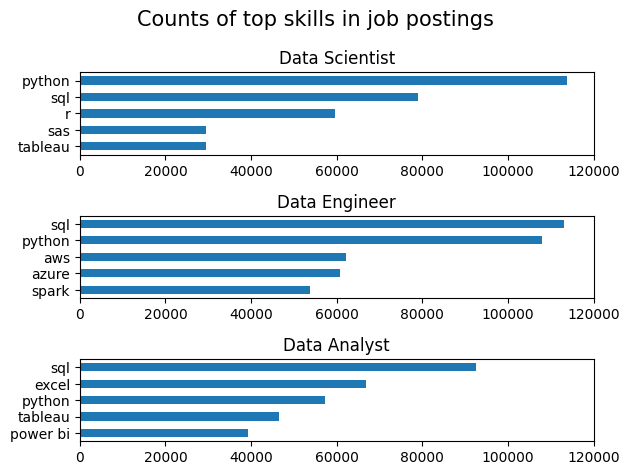

In [24]:
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst'] # reference list to make the formula flexible

fig, ax = plt.subplots(3,1) # subplot formula 

for i, job_title in enumerate(job_titles): # for loop using enumerate function to iterate the index
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis() # invert values on the y axis 
    ax[i].set_ylabel('') # delete y label
    ax[i].legend().set_visible(False) # hide legend
    ax[i].set_xlim(0, 120000) #set the x axis equal on all charts

fig.suptitle('Counts of top skills in job postings', fontsize=15)  #main title
fig.tight_layout() #this goes always last, to format
   

Let's now try to do the same with the median salary per skill per role

In [25]:
# median salary per skills by job title
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skill_salary = df_skills.groupby(['job_skills', 'job_title_short'])['salary_year_avg'].median()
df_skills_salary = skill_salary.reset_index(name='median_salary')
df_skills_salary.sort_values(by='median_salary', ascending=False, inplace=True)

df_skills_salary

,job_skills,job_title_short,median_salary
1892,svn,Data Analyst,400000.0
2131,vmware,Senior Data Analyst,375000.0
2242,yarn,Senior Data Analyst,340000.0
74,arch,Senior Data Engineer,249000.0
81,asana,Data Scientist,244500.0
...,...,...,...
2235,xamarin,Software Engineer,NaN
2236,yarn,Business Analyst,NaN
2237,yarn,Cloud Engineer,NaN
2241,yarn,Machine Learning Engineer,NaN


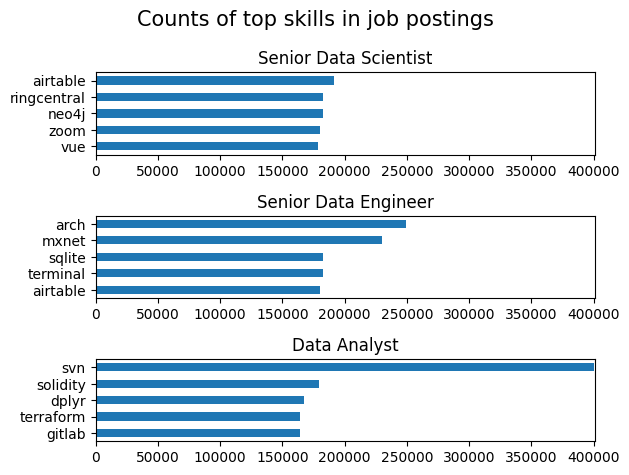

In [31]:
job_titles = ['Senior Data Scientist', 'Senior Data Engineer', 'Data Analyst'] # reference list to make the formula flexible

fig, ax = plt.subplots(3,1) # subplot formula 

for i, job_title in enumerate(job_titles): # for loop using enumerate function to iterate the index
    df_plot = df_skills_salary[df_skills_salary['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='median_salary', ax=ax[i], title=job_title)
    ax[i].invert_yaxis() # invert values on the y axis 
    ax[i].set_ylabel('') # delete y label
    ax[i].legend().set_visible(False) # hide legend
    ax[i].set_xlim(0,401_000)
    
fig.suptitle('Counts of top skills in job postings', fontsize=15)  #main title
fig.tight_layout() #this goes always last, to format

### Exercises

🟩 Subplots with Bar Charts (2.13.1) - Problem
Matplotlib Format Charts
Problem Statement:

Create a subplot with 2 rows and 1 column:

    In the first subplot, plot a bar chart of the top 3 job locations by the number of job postings.
    In the second subplot, plot a horizontal bar chart of the top 3 job titles by the number of job postings.
    Use tight_layout() to adjust the spacing between subplots.

Hint:

Use plt.subplots() to create the subplots and fig.tight_layout() to adjust the spacing.

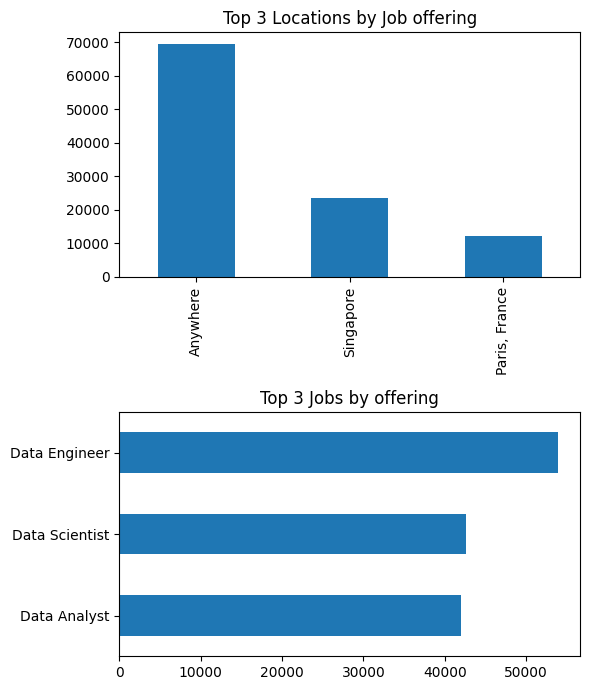

In [80]:
fig, ax = plt.subplots(2, 1, figsize=(6,7))

df_locations = df.groupby('job_location').size().reset_index(name='location_count').sort_values(by='location_count', ascending=False).head(3) #top 3 locations by size
df_titles= df.groupby('job_title').size().reset_index(name='job_count').sort_values(by='job_count', ascending=False).head(3) #top 3 titles by size

df_locations.plot(kind='bar', x='job_location', xlabel='', ylabel='', title='Top 3 Locations by Job offering', ax=ax[0])
df_titles.plot(kind='barh', x='job_title', y='job_count', xlabel='', ylabel='', title='Top 3 Jobs by offering', ax=ax[1])

ax[0].legend().set_visible(False)
ax[1].legend().set_visible(False)
ax[1].invert_yaxis()

fig.tight_layout()

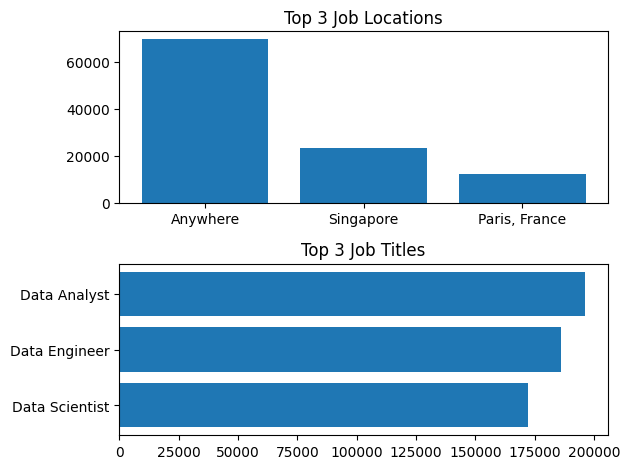

In [81]:
# other version 
fig, ax = plt.subplots(2, 1)

# Top 3 job locations
job_locations = df['job_location'].value_counts().head(3)
ax[0].bar(job_locations.index, job_locations.values)
ax[0].set_title('Top 3 Job Locations')

# Top 3 job titles
job_titles = df['job_title_short'].value_counts().head(3)
ax[1].barh(job_titles.index, job_titles.values)
ax[1].set_title('Top 3 Job Titles')
ax[1].invert_yaxis()

fig.tight_layout()
plt.show()

🟨 Subplots with Job Titles by Schedule (2.13.2) - Problem
Matplotlib Format Charts
Problem Statement:

Create a subplot with 2 rows and 2 columns:

    In each subplot, plot a bar chart of the top 3 job titles by the number of job postings for each job schedule type (Full-time, Part-time, Contractor, and Internship).
    Use fig.tight_layout() to adjust the spacing between subplots.


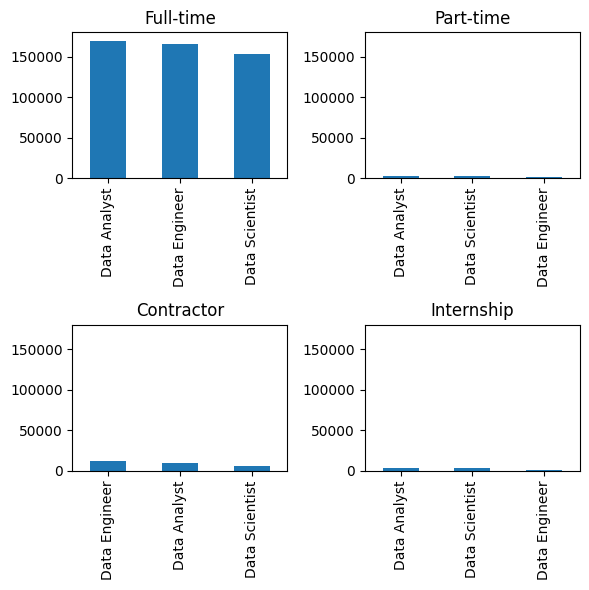

In [109]:
schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']
df_job_count = df.groupby(['job_title_short', 'job_schedule_type']).size().reset_index(name='count')

fig, ax = plt.subplots(2,2, figsize=(6,6))

for i, schedule in enumerate(schedules):
    row, col = divmod(i, 2)  # Convert index to 2D grid position
    top_3_jobs = df_job_count[df_job_count['job_schedule_type'] == schedule].sort_values(by='count', ascending=False).head(3)
    top_3_jobs.plot(kind='bar', y='count', x='job_title_short', xlabel='', ylabel='', title=schedule, legend=False, ax=ax[row][col])
    ax[row][col].set_ylim(0,180_000)
    

plt.tight_layout()

In [110]:
help(divmod)

Help on built-in function divmod in module builtins:

divmod(x, y, /)
    Return the tuple (x//y, x%y).  Invariant: div*y + mod == x.



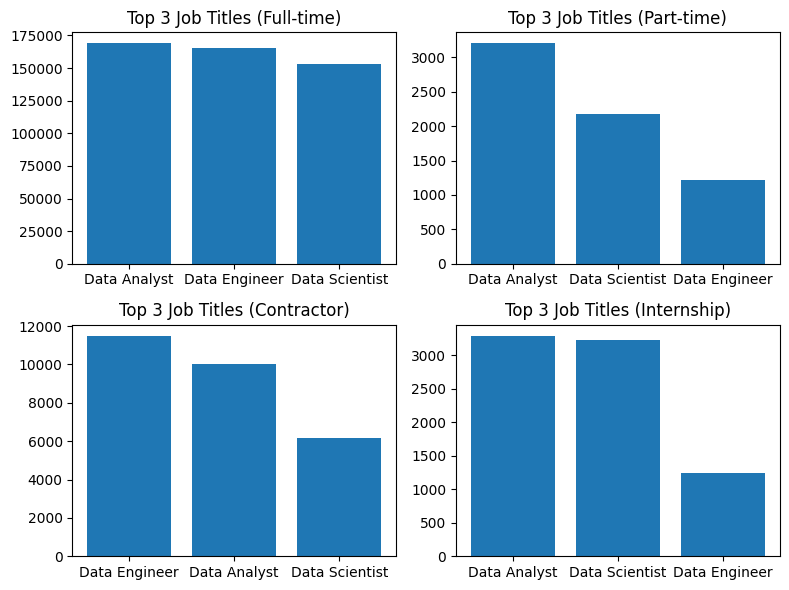

In [115]:
# other version

fig, ax = plt.subplots(2, 2, figsize= (8,6))

# Job schedule types
schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']

for i, schedule in enumerate(schedules):
    df_schedule = df[df['job_schedule_type'] == schedule]
    job_titles = df_schedule['job_title_short'].value_counts().head(3)
    ax[i//2, i%2].bar(job_titles.index, job_titles.values)
    ax[i//2, i%2].set_title(f'Top 3 Job Titles ({schedule})')

fig.tight_layout()
plt.show()

🟥 Top Skills for Job Roles Subplots (2.13.3) - Problem
Matplotlib Format Charts
Problem Statement:

Create a subplot with 3 rows and 1 column:

    In each subplot, plot a horizontal bar chart of the top 3 job skills by the number of job postings for each job title (Senior Data Scientist, Senior Data Engineer, and Senior Data Analyst).
    Use fig.tight_layout() to adjust the spacing between subplots and invert_yaxis() to invert the y-axis in each subplot.


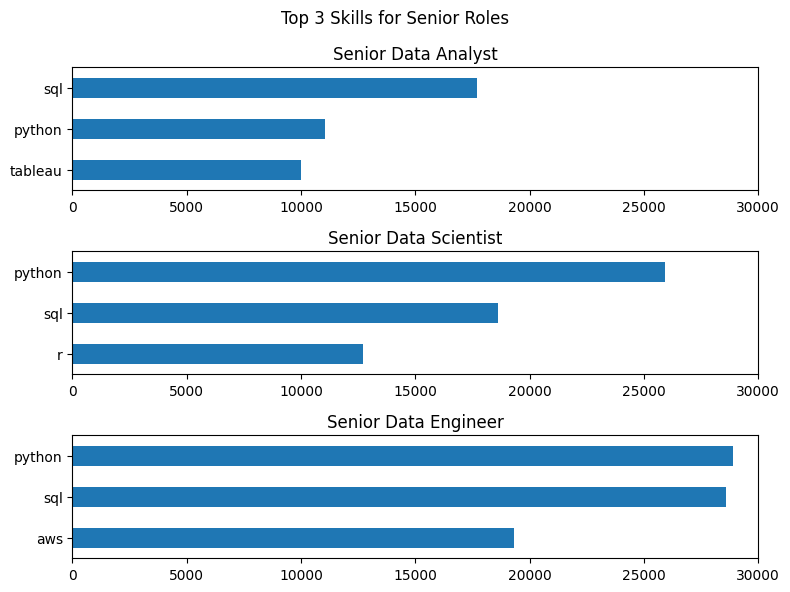

In [138]:
job_roles = ['Senior Data Analyst', 'Senior Data Scientist', 'Senior Data Engineer']
df_exploded = df.explode('job_skills')

fig, ax = plt.subplots(3,1, figsize=(8,6))

for i, roles in enumerate(job_roles):
    df_top_skill = df_exploded[df_exploded['job_title_short'] == roles]
    top_skills = df_top_skill['job_skills'].value_counts().head(3)
    top_skills.plot(kind='barh', y='job_title_short', xlabel='', ylabel='', title=roles, legend=False, ax=ax[i])
    ax[i].invert_yaxis()
    ax[i].set_xlim(0,30_000)

fig.suptitle('Top 3 Skills for Senior Roles')
fig.tight_layout()
